In [1]:
import numpy as pd
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Dimensions of our images
img_width, img_height = 224, 224

train_dir = 'data/train'
valid_dir = 'data/valid'

## Data preprocessing

In [2]:
from keras.preprocessing.image import ImageDataGenerator

# Pixel values rescaling from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1. / 255)
batch_size = 16

# Retrieve images and their classes for train and validation sets
train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)

valid_gen = datagen.flow_from_directory(
        valid_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)

Using TensorFlow backend.


Found 1483 images belonging to 149 classes.
Found 395 images belonging to 149 classes.


## Define model architecture

In [3]:
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.models import Sequential

nb_classes = 149

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Train the model

In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

epochs = 100
nb_train_samples = 1483
nb_valid_samples = 395

# Model saving callback
checkpointer = ModelCheckpoint(filepath='simple_best_weights_cnn.h5', monitor='val_acc', verbose=1, save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', verbose=1, patience=5)

history = model.fit_generator(
        train_gen,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks=[checkpointer, early_stopping],
        validation_data=valid_gen,
        validation_steps=nb_valid_samples // batch_size,)

Epoch 1/100
92/92 [==============================] - 62s - loss: 5.0225 - acc: 0.0156 - val_loss: 4.9497 - val_acc: 0.0182
Epoch 2/100
92/92 [==============================] - 60s - loss: 4.6434 - acc: 0.0716 - val_loss: 4.7330 - val_acc: 0.0651
Epoch 3/100
92/92 [==============================] - 60s - loss: 3.0633 - acc: 0.3396 - val_loss: 4.7670 - val_acc: 0.1354
Epoch 4/100
92/92 [==============================] - 59s - loss: 1.3443 - acc: 0.6891 - val_loss: 6.4473 - val_acc: 0.1198
Epoch 5/100
92/92 [==============================] - 61s - loss: 0.5398 - acc: 0.8703 - val_loss: 6.0785 - val_acc: 0.1615
Epoch 6/100
92/92 [==============================] - 63s - loss: 0.3056 - acc: 0.9393 - val_loss: 6.9241 - val_acc: 0.2057
Epoch 7/100
92/92 [==============================] - 61s - loss: 0.2371 - acc: 0.9528 - val_loss: 6.0903 - val_acc: 0.1797
Epoch 8/100
92/92 [==============================] - 61s - loss: 0.1568 - acc: 0.9651 - val_loss: 7.1606 - val_acc: 0.1953
Epoch 9/100
92/9

## Plot the result

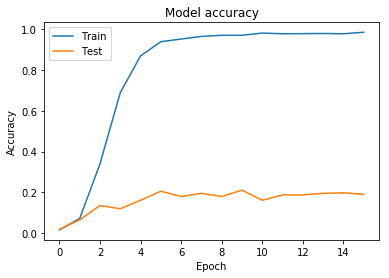

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The model seem to be overfitting, this could cause by the lack of dataset. In other words, only 10 images of each class use for training.

## Data augmentation

In [7]:
augmented_datagen = ImageDataGenerator(
        rescale=1. / 255,      # Normalize pixel values to [0,1]
        shear_range=0.2,       # Randomly applies shearing transformation
        zoom_range=0.2,        # Randomly applies shearing transformation
        horizontal_flip=True)  # Randomly flip the images

# Retrieve images and their classes for train and validation sets
train_gen = augmented_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)


Found 1484 images belonging to 149 classes.


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model saving callback
checkpointer = ModelCheckpoint(filepath='augmented_simple_cnn_best_weight.h5', 
                               monitor='val_acc', verbose=1, save_best_only=True)

history = model.fit_generator(
        train_gen,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks=[checkpointer, early_stopping],
        validation_data=valid_gen,
        validation_steps=nb_valid_samples // batch_size,)

Epoch 1/100
92/92 [==============================] - 65s - loss: 3.7781 - acc: 0.2509 - val_loss: 3.7852 - val_acc: 0.2448
Epoch 2/100
92/92 [==============================] - 60s - loss: 3.1607 - acc: 0.3526 - val_loss: 3.5314 - val_acc: 0.2708
Epoch 3/100
92/92 [==============================] - 65s - loss: 2.7032 - acc: 0.4180 - val_loss: 3.3049 - val_acc: 0.3073
Epoch 4/100
92/92 [==============================] - 68s - loss: 2.3401 - acc: 0.4814 - val_loss: 3.1874 - val_acc: 0.3229
Epoch 5/100
92/92 [==============================] - 68s - loss: 2.1335 - acc: 0.5077 - val_loss: 3.3221 - val_acc: 0.3203
Epoch 6/100
92/92 [==============================] - 67s - loss: 1.8441 - acc: 0.5770 - val_loss: 3.0894 - val_acc: 0.3438
Epoch 7/100
92/92 [==============================] - 68s - loss: 1.6818 - acc: 0.5965 - val_loss: 3.3931 - val_acc: 0.3229
Epoch 8/100
92/92 [==============================] - 67s - loss: 1.3894 - acc: 0.6683 - val_loss: 3.1923 - val_acc: 0.3516
Epoch 9/100
92/9

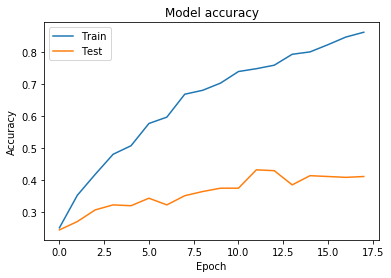

In [10]:
fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

After apply data augmentation, the score now increase. Not bad.

## Evaluate on test dataset

In [11]:
test_gen = datagen.flow_from_directory(
        'data/test',
        target_size=(img_width, img_height),
        batch_size=batch_size)


Found 149 images belonging to 149 classes.


### Evaluate loss and accuracy of the unaugmented model

In [13]:
model.load_weights('simple_best_weights_cnn.h5')
model.evaluate_generator(test_gen, 149)

[7.9256459610344585, 0.18789237680857493]

### Evaluate loss and accuracy of the augmented model

In [14]:
model.load_weights('augmented_simple_cnn_best_weight.h5')
model.evaluate_generator(test_gen, 149)

[3.1662308806261139, 0.43587443979599017]